<a href="https://colab.research.google.com/github/bishwa011/ML-PRACTICES/blob/main/Customer_segmentation_using_K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Importing thr required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [8]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [10]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
#DATA PREPROCESSING
#HANDLING CATEGORICCAL DATA
df['Gender'] = df['Gender'].map({'Male' :0, 'Female':1})

In [17]:
#Select Features relevant to cluster
x = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [19]:
#DATA NORMALIZATION

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

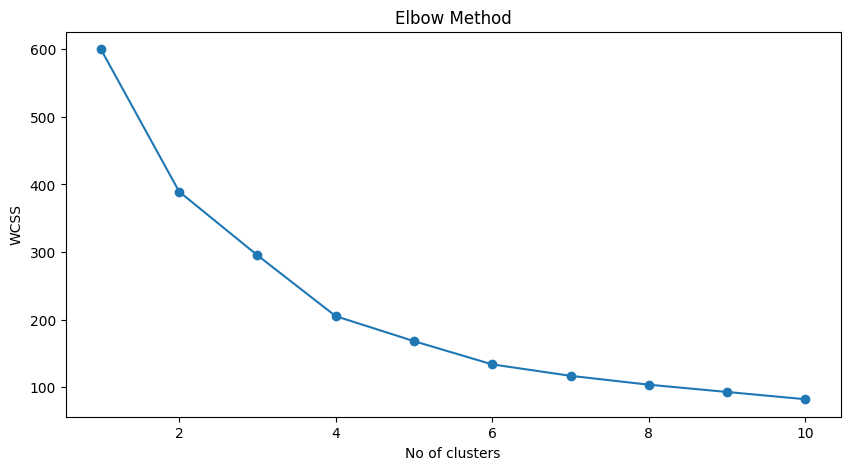

In [24]:
#Apply Kmeans CLustering
#use elbow method to find the optimal numberr of clusters

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init='k-means++', max_iter= 300, n_init=10, random_state=42)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)


plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss, marker = 'o')
plt.title('Elbow Method')
plt.xlabel("No of clusters")
plt.ylabel('WCSS')
plt.show()

In [26]:
#Apply with opimal no of cl;usters (here 5)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init =10, random_state = 42)
kmeans.fit(x_scaled)
df['cluster'] = kmeans.labels_

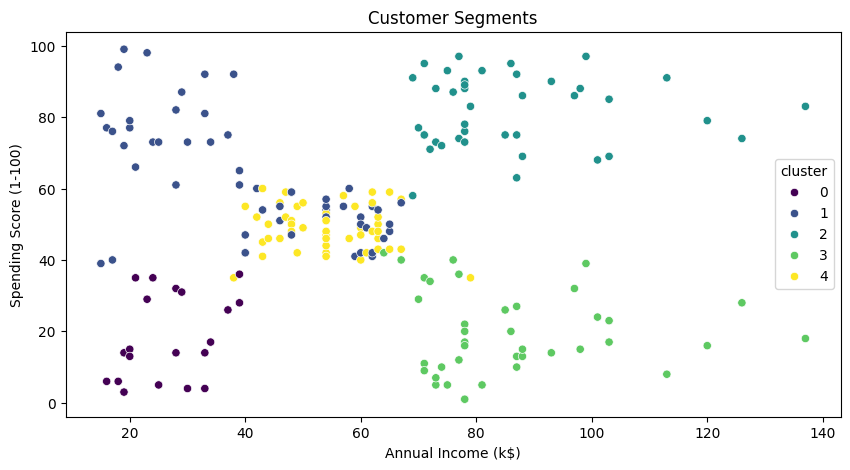

In [30]:
#visualize clusters

plt.figure(figsize = (10,5))
sns.scatterplot (x='Annual Income (k$)', y= 'Spending Score (1-100)', hue='cluster', palette= 'viridis', data= df)
plt.title('Customer Segments')
plt.show()

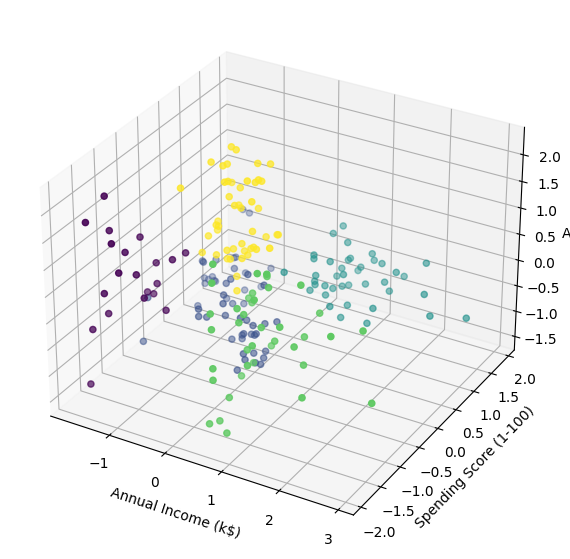

In [31]:
# TRYING #D visualization
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x_scaled[:, 1], x_scaled[:, 2], x_scaled[:, 0], c=df['cluster'] , cmap = 'viridis')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
plt.show()

In [33]:
df.groupby('cluster').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,,,
0,24.100000,0.600000,46.250000,26.750000,18.350000
1,55.648148,0.592593,25.185185,41.092593,62.240741
2,161.025000,0.550000,32.875000,86.100000,81.525000
3,159.743590,0.487179,39.871795,86.102564,19.358974
4,83.872340,0.574468,55.638298,54.382979,48.851064


In [34]:
df.to_csv('Mall_customers_with_clusters.csv', index = False)